<a href="https://colab.research.google.com/github/victorm0202/curso_ML_metagenomica/blob/main/notebooks/2_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![figure](https://drive.google.com/uc?export=view&id=1aBthHd8htwQd89eWTOSDaDClpisx5FsA)

<center> Estadística y computación para metagenómica<center>

<center> Víctor Muñiz Sánchez <center>
<center> Junio 2023 <center>

# Regresión logística

## Ejemplo: extramarital affairs dataset con un enfoque de modelos estadísticos

Ver `2a-log_reg.ipynb`

## Ejemplo ilustrativo

Datos sintéticos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

def plot_classifier(clf, X_train, y_train, X_test, y_test):
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=.5)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot training and test points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y_train == i)
        plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)
        idx2 = np.where(y_test == i)
        plt.scatter(X_test[idx2, 0], X_test[idx2, 1],s=50, linewidth=2, facecolors = 'none', 
                    edgecolor=color,alpha=.8)

<ipython-input-1-499ac947c888>:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, cmap=plt.cm.Paired,


training score : 0.964 (multinomial)
test score : 0.973 (multinomial)


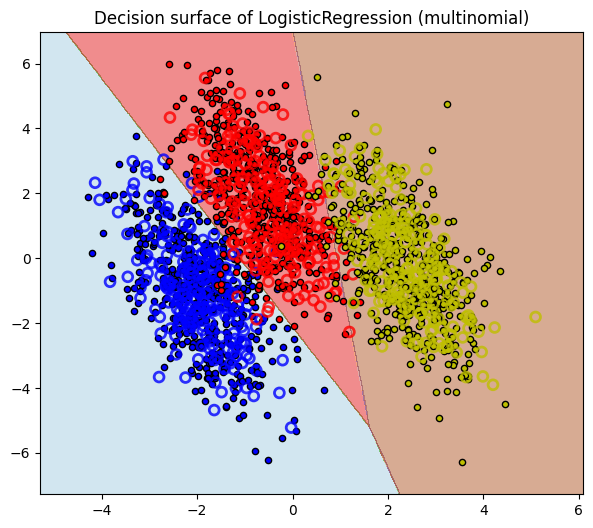

In [2]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=1.4, random_state=0)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#multi_class = 'ovr'
multi_class = 'multinomial'
# in sklearn, solver does not include Newton-Raphson method, 
# (see statsmodels and scipy libraries if you want to use it)
# sag is a stochastic gradient descent method, (see the sklearn.linear_model.LogisticRegression documentation)
log_model = LogisticRegression(solver='sag', max_iter=100, random_state=42, multi_class=multi_class)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

plot_classifier(log_model, X_train, y_train, X_test, y_test)

# print the training and test scores
print("training score : %.3f (%s)" % (log_model.score(X_train, y_train), multi_class))
print("test score : %.3f (%s)" % (log_model.score(X_test, y_test), multi_class))


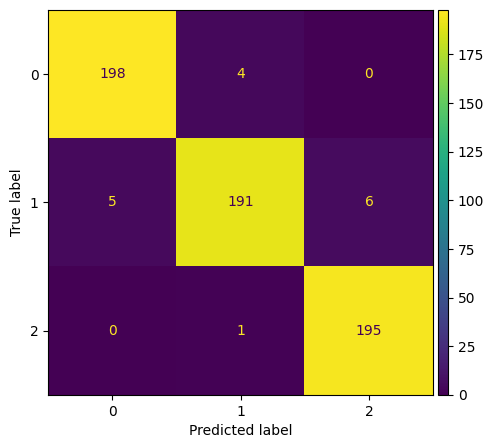

In [3]:
plt.style.use('default') 
cm = metrics.confusion_matrix(y_test,y_pred)
disp_cm = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(log_model.classes_)))
fig, ax = plt.subplots(figsize=(5,5))

disp_cm.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp_cm.im_,  cax=cax);

In [4]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       202
           1       0.97      0.95      0.96       202
           2       0.97      0.99      0.98       196

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



## Ejemplo: OTUs

In [5]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
os.chdir('/content/drive/My Drive/Cursos/metagenomica/Notebooks/')
!pwd

/content/drive/My Drive/Cursos/metagenomica/Notebooks


In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

otus = pd.read_csv("../data/OTUS_conservados.csv", index_col="X")

cont_names = list(otus.drop(["New_Labels","Latitude", "Longitude"], axis=1).columns)
y_names = ["New_Labels"]
otus_df = otus[cont_names+y_names]
otus_df

,X4457032,X4471583,X9560,X4468101,X198079,X101868,X4360511,X9961,X3944484,X1105039,...,X218246,X48487,X81081,X1787355,X6159,X154268,X855996,X99400,X716037,New_Labels
X,,,,,,,,,,,,,,,,,,,,,
1001.skm3,0.003306,0.000000,0.0,0.000000,0.0,0.005785,0.000000,0.0,0.000000,0.000000,...,0.00000,0.004752,0.007231,0.000000,0.000000,0.0,0.002273,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skd3,0.002699,0.000000,0.0,0.000000,0.0,0.001080,0.000180,0.0,0.000000,0.000000,...,0.00000,0.003419,0.029872,0.000180,0.000000,0.0,0.000720,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skm1,0.001304,0.000000,0.0,0.000000,0.0,0.002934,0.000000,0.0,0.000000,0.000000,...,0.00000,0.004563,0.004563,0.000326,0.000000,0.0,0.001304,0.000000,0.00000,WarmT-SumDry-HotSum0
1001.skb3,0.009130,0.000000,0.0,0.000000,0.0,0.004966,0.000000,0.0,0.000000,0.000000,...,0.00016,0.004645,0.008169,0.000961,0.000000,0.0,0.002243,0.000160,0.00032,WarmT-SumDry-HotSum0
1001.skm2,0.001022,0.000000,0.0,0.000000,0.0,0.000341,0.000000,0.0,0.000000,0.000000,...,0.00000,0.005112,0.010907,0.000682,0.000000,0.0,0.002045,0.000000,0.00000,WarmT-SumDry-HotSum0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883.2011.282.crump.artic.ltreb.main.lane4.noindex,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000028,0.0,0.000028,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.006404,0.0,0.000000,0.001601,0.00000,Snow-FullH-CoolSum8
1883.2011.329.crump.artic.ltreb.main.lane4.noindex,0.000110,0.000000,0.0,0.000028,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000248,0.00000,Snow-FullH-CoolSum8
1883.2011.348.crump.artic.ltreb.main.lane4.noindex,0.000528,0.000024,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000312,...,0.00000,0.000000,0.000000,0.000000,0.000024,0.0,0.000000,0.000744,0.00000,Snow-FullH-CoolSum8


El problema de clasificación es complejo: tiene muchas categorías y está muy desbalanceado...

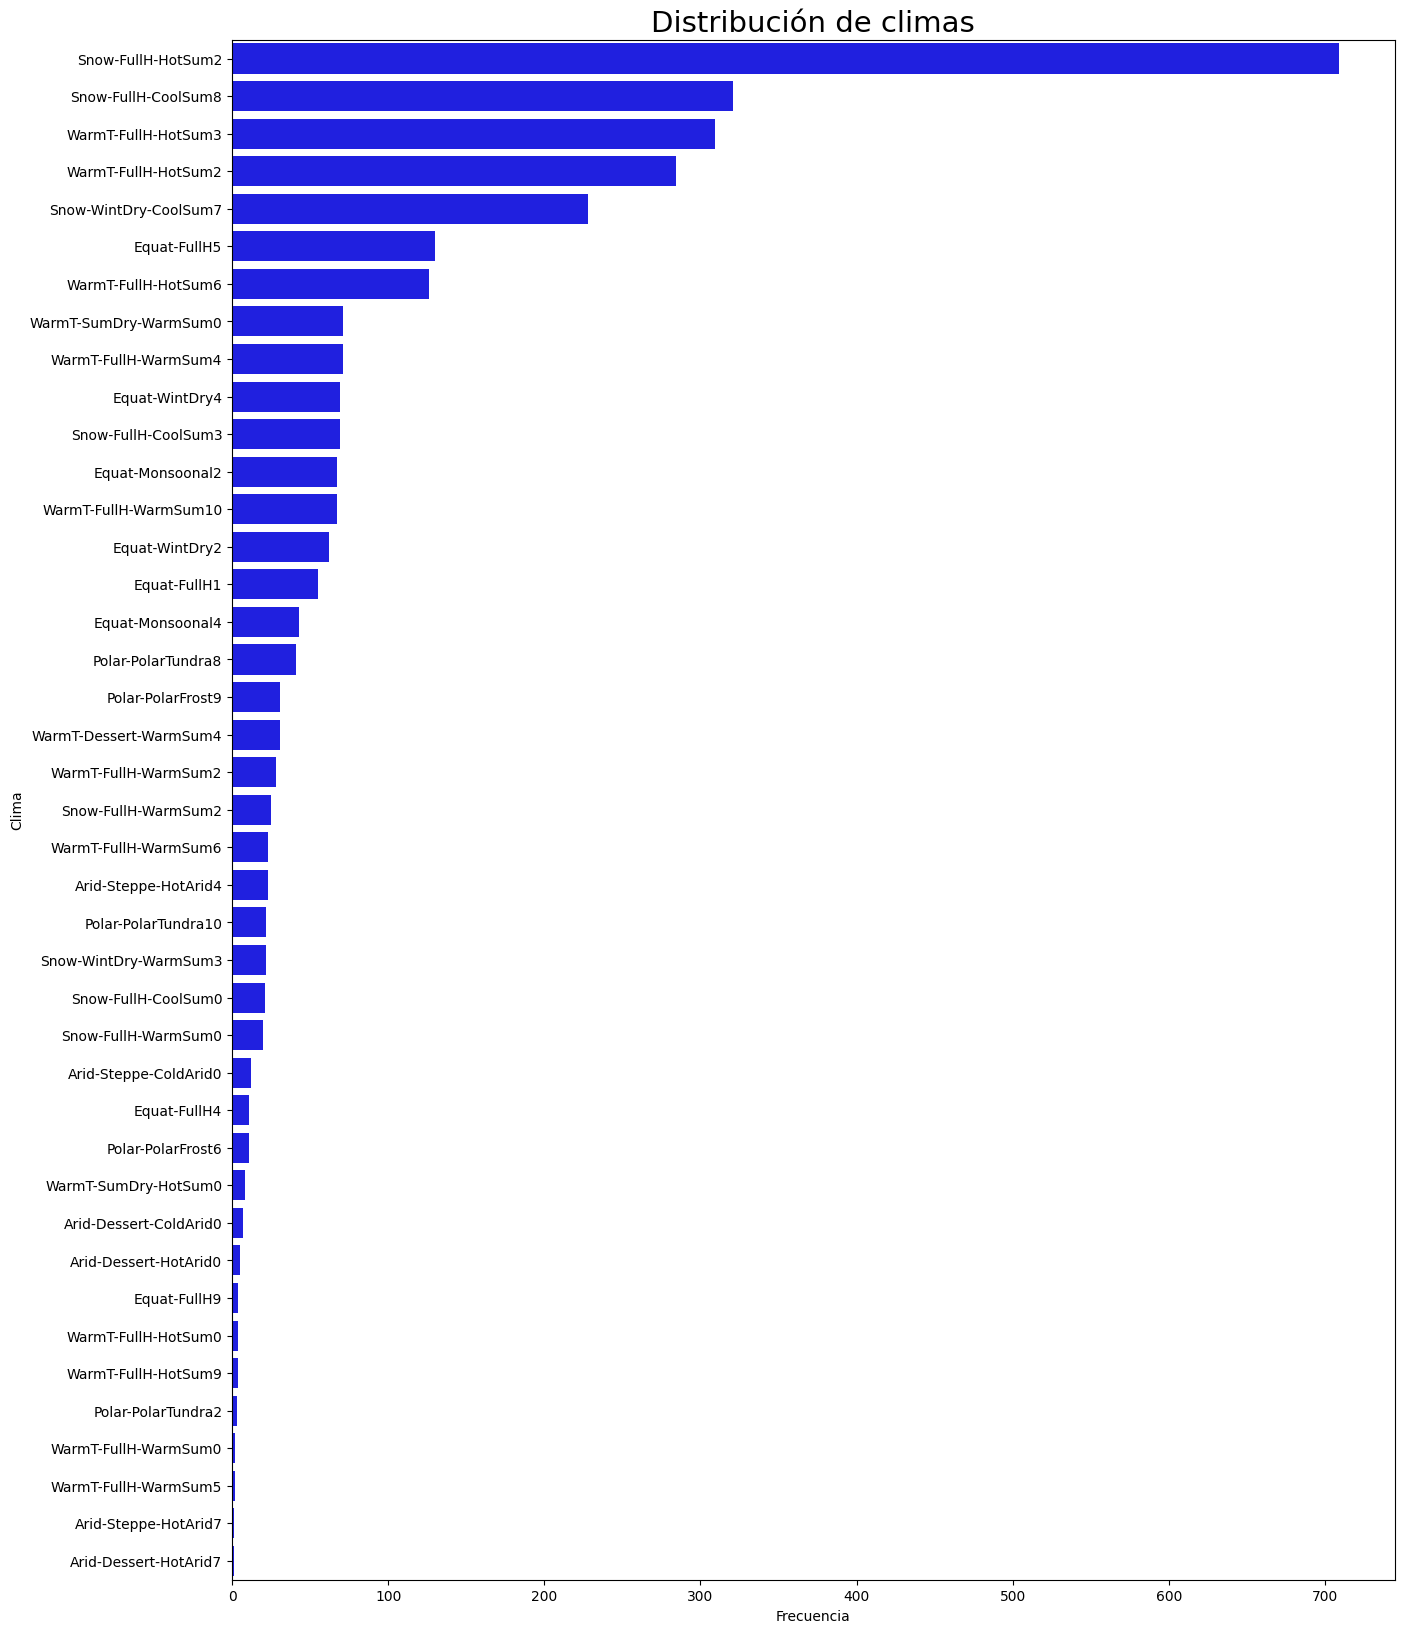

In [8]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 20))
sns.countplot(data=otus_df, y="New_Labels", order=otus_df.New_Labels.value_counts().index, color="blue")
plt.xlabel("Frecuencia")
plt.ylabel("Clima")
plt.title("Distribución de climas", fontsize=21)
plt.show()

Para fines didácticos, restrinjo los datos a aquellos que tienen al menos `n_min` datos en su categoría:

In [9]:
def get_reduced_data(data,y_counts,ylab='New_Labels',n_min=20):
    y_val = y_counts[y_counts>n_min]
    data_val_df = data.loc[data[ylab].isin(y_val.index)]
    return data_val_df, y_val

In [10]:
y_counts = otus_df.New_Labels.value_counts()
y_counts

Snow-FullH-HotSum2        709
Snow-FullH-CoolSum8       321
WarmT-FullH-HotSum3       309
WarmT-FullH-HotSum2       284
Snow-WintDry-CoolSum7     228
Equat-FullH5              130
WarmT-FullH-HotSum6       126
WarmT-SumDry-WarmSum0      71
WarmT-FullH-WarmSum4       71
Equat-WintDry4             69
Snow-FullH-CoolSum3        69
Equat-Monsoonal2           67
WarmT-FullH-WarmSum10      67
Equat-WintDry2             62
Equat-FullH1               55
Equat-Monsoonal4           43
Polar-PolarTundra8         41
Polar-PolarFrost9          31
WarmT-Dessert-WarmSum4     31
WarmT-FullH-WarmSum2       28
Snow-FullH-WarmSum2        25
WarmT-FullH-WarmSum6       23
Arid-Steppe-HotArid4       23
Polar-PolarTundra10        22
Snow-WintDry-WarmSum3      22
Snow-FullH-CoolSum0        21
Snow-FullH-WarmSum0        20
Arid-Steppe-ColdArid0      12
Equat-FullH4               11
Polar-PolarFrost6          11
WarmT-SumDry-HotSum0        8
Arid-Dessert-ColdArid0      7
Arid-Dessert-HotArid0       5
Equat-Full

In [11]:
n_min = 70
otus_val_df, y_val = get_reduced_data(otus_df,y_counts,'New_Labels',n_min)
otus_val_df.shape

(2249, 604)

In [12]:
y_val.index

Index(['Snow-FullH-HotSum2', 'Snow-FullH-CoolSum8', 'WarmT-FullH-HotSum3',
       'WarmT-FullH-HotSum2', 'Snow-WintDry-CoolSum7', 'Equat-FullH5',
       'WarmT-FullH-HotSum6', 'WarmT-SumDry-WarmSum0', 'WarmT-FullH-WarmSum4'],
      dtype='object')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
%matplotlib inline
#plt.style.use('seaborn') 

Creo las variables dependientes e independientes. Para las variables dependientes, uso una codificación numérica de la respuesta con `LabelEncoder`

In [14]:
y = np.array(otus_val_df[y_names]).ravel()
X = np.array(otus_val_df.drop(y_names,axis=1)).astype('float')

le = preprocessing.LabelEncoder()
le.fit(y)
#le.classes_
y_cat = le.transform(y)
#le.inverse_transform(y_cat[:5])

Creamos conjunto de datos de entrenamiento y prueba

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=0)

In [16]:
logreg = LogisticRegression(solver='sag')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


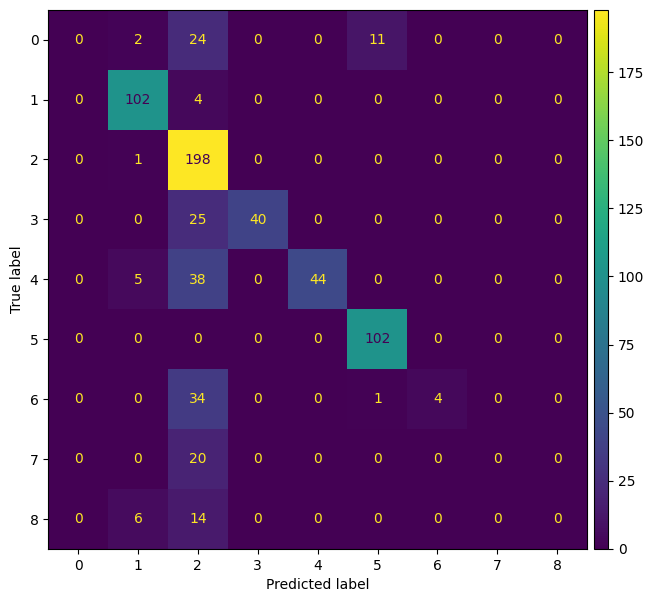

In [17]:
plt.style.use('default') 
cm = metrics.confusion_matrix(y_test,y_pred)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [18]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.88      0.96      0.92       106
           2       0.55      0.99      0.71       199
           3       1.00      0.62      0.76        65
           4       1.00      0.51      0.67        87
           5       0.89      1.00      0.94       102
           6       1.00      0.10      0.19        39
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        20

    accuracy                           0.73       675
   macro avg       0.59      0.46      0.47       675
weighted avg       0.72      0.73      0.67       675



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Representación PCA

Ahora, veamos los resultados usando una versión simplificada de los datos con PCA.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
ncomp=3
otus_pca=PCA(ncomp)
otus_pca.fit_transform(X_train_std)
X_train_pca = otus_pca.transform(X_train_std)
proj = pd.DataFrame(X_train_pca,columns = ['pc1','pc2','pc3'])
pca_proj = pd.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'clima': y_train})

In [20]:
# Grafica interactiva
fig = px.scatter(pca_proj, x='pc1', y='pc2', hover_data=['clima'], color = 'clima')
fig.update_layout(autosize=False,width=800,height=800,)
fig.show()

In [21]:
X_test_std = scaler.fit_transform(X_test)
X_test_pca = otus_pca.transform(X_test_std)

In [22]:
logreg2 = LogisticRegression(solver='newton-cg')
logreg2.fit(X_train_pca, y_train)

y_pred2 = logreg2.predict(X_test_pca)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_pca, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


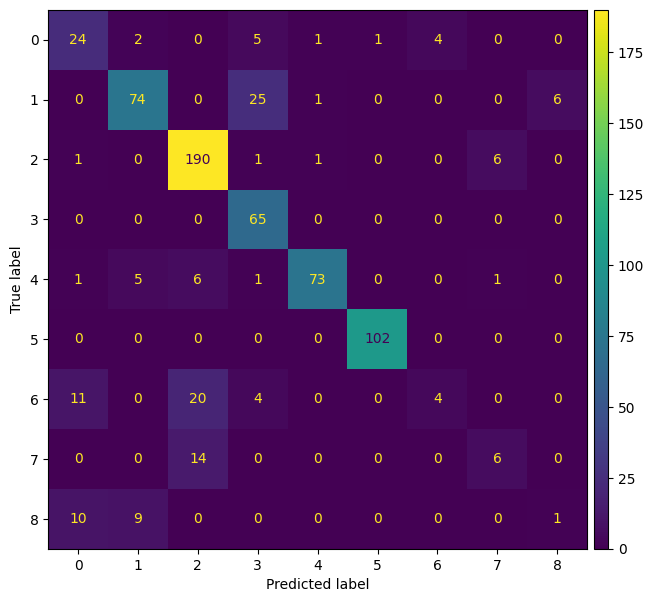

In [23]:
cm = metrics.confusion_matrix(y_test,y_pred2)
disp1 = metrics.ConfusionMatrixDisplay(cm, display_labels=np.arange(len(le.classes_)))
fig, ax = plt.subplots(figsize=(7,7))

disp1.plot(ax=ax, colorbar=False)
# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(disp1.im_,  cax=cax);

In [24]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.51      0.65      0.57        37
           1       0.82      0.70      0.76       106
           2       0.83      0.95      0.89       199
           3       0.64      1.00      0.78        65
           4       0.96      0.84      0.90        87
           5       0.99      1.00      1.00       102
           6       0.50      0.10      0.17        39
           7       0.46      0.30      0.36        20
           8       0.14      0.05      0.07        20

    accuracy                           0.80       675
   macro avg       0.65      0.62      0.61       675
weighted avg       0.78      0.80      0.78       675

